## Trying MPS with PyTorch 2.5.1

In [1]:
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler

In [2]:
# from huggingface_hub import login
# login()

In [ ]:
import torch

device = "mps"

STABLE_DIFFUSION_1_5 = False
STABLE_DIFFUSION_2 = True


if STABLE_DIFFUSION_1_5:
    pipe = DiffusionPipeline.from_pretrained(
        "runwayml/stable-diffusion-v1-5",
        use_safetensors=True,
        low_cpu_mem_usage=False,
    )

    pipe.enable_attention_slicing()
    pipe = pipe.to(device)

if STABLE_DIFFUSION_2:
    pipe = DiffusionPipeline.from_pretrained(
        "stabilityai/stable-diffusion-2-base",
        use_safetensors=True,
        low_cpu_mem_usage=False,
    )

    pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
    pipe.enable_attention_slicing()
    pipe = pipe.to(device)

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

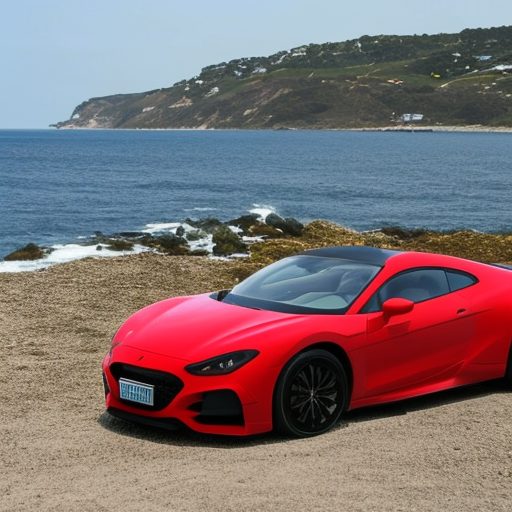

In [11]:
generator = torch.Generator(device).manual_seed(190)
prompt = "A red sports car at the coast. Make sure the full car is visble from the side."
steps = 60
image = pipe(
    prompt,
    num_inference_steps=steps,
    generator=generator,
    ).images[0]
image.save("car-2-0.png")
display(image)